In [1]:
import meep as mp
import sys
sys.path.append('../..')
from metamaterials import lithography as lt

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


/home/gridsan/mcomella/metamaterials/examples/lithography/../../metamaterials/lithography.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([xi[i], xf[i]], [yi[i], yf[i]], 'k-', color=str(1-pi[i]))


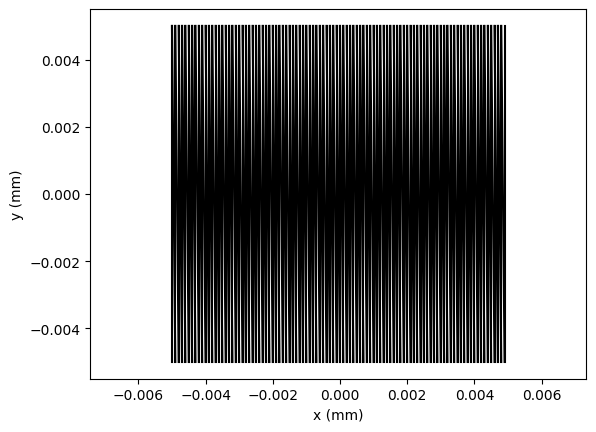

In [2]:
geometry = [mp.Block(size=mp.Vector3(0.01, 0.01, 0.0001), center=mp.Vector3(0, 0, 0), material=mp.Medium(index=1.5))]

M = lt.draw_block(geometry[0], 0, 0)
M = lt.plot_lithography(M)

Create a grid varying power level and time

In [3]:
import pandas as pd

nrows = 1
ncols = 2
cell_param = 0.01
d = 0.5*cell_param

geometry = [mp.Block(size=mp.Vector3(d, d, 0.0001), center=mp.Vector3(0, 0, 0), material=mp.Medium(index=1.5))]

M = pd.DataFrame()
for i in range(nrows):
    for j in range(ncols):
        x_offset = i*cell_param
        y_offset = j*cell_param
        mat = lt.draw_block(geometry[0], x_offset, y_offset)
        M = pd.concat([M, mat])

/home/gridsan/mcomella/metamaterials/examples/lithography/../../metamaterials/lithography.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([xi[i], xf[i]], [yi[i], yf[i]], 'k-', color=str(1-pi[i]))


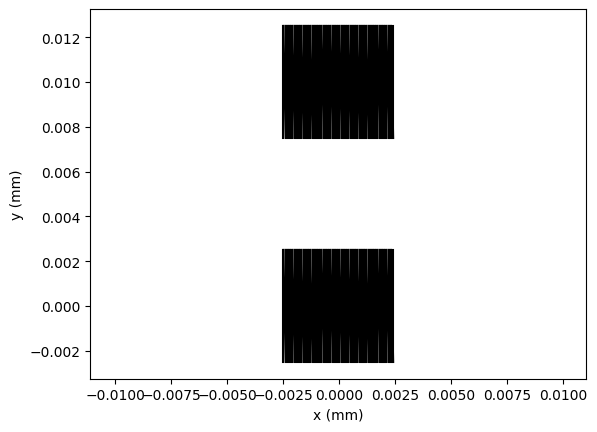

In [4]:
lt.plot_lithography(M)

In the example they use speed 

In [5]:
import numpy as np

power = np.arange(0.1, 1, 0.1)
speed = np.linspace(0.001, 0.01, 10)

M = pd.DataFrame()
for i in range(len(power)):
    for j in range(len(speed)):
        x_offset = i*cell_param
        y_offset = j*cell_param
        matrix = lt.draw_block(geometry[0], x_offset, y_offset, speed=speed[j], power=power[i])
        M = pd.concat([M, matrix])

In [6]:
M

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-0.0025,-0.0025,0.1,-0.0025,0.0025,0.1,5.0,0,0,0
0,-0.0025,0.0025,0.1,-0.0024,-0.0025,0.1,5.0,0,0,0
0,-0.0024,-0.0025,0.1,-0.0024,0.0025,0.1,5.0,0,0,0
0,-0.0024,0.0025,0.1,-0.0023,-0.0025,0.1,5.0,0,0,0
0,-0.0023,-0.0025,0.1,-0.0023,0.0025,0.1,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0,0.0822,0.0875,0.9,0.0822,0.0925,0.9,0.5,0,0,0
0,0.0822,0.0925,0.9,0.0823,0.0875,0.9,0.5,0,0,0
0,0.0823,0.0875,0.9,0.0823,0.0925,0.9,0.5,0,0,0
0,0.0823,0.0925,0.9,0.0824,0.0875,0.9,0.5,0,0,0


/home/gridsan/mcomella/metamaterials/examples/lithography/../../metamaterials/lithography.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([xi[i], xf[i]], [yi[i], yf[i]], 'k-', color=str(1-pi[i]))


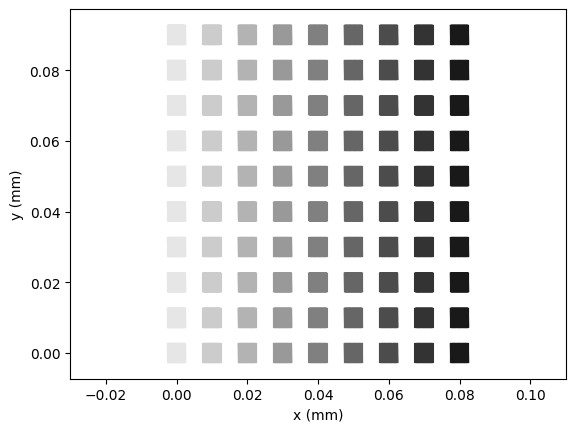

In [7]:
lt.plot_lithography(M)